# K Nearest Neighbors(K-NN)

## Import Libraries

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline

## Get the Data

In [4]:
glass_data = pd.read_csv("../Resource/glass.csv")

In [5]:
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
glass_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


In [7]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
glass_data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

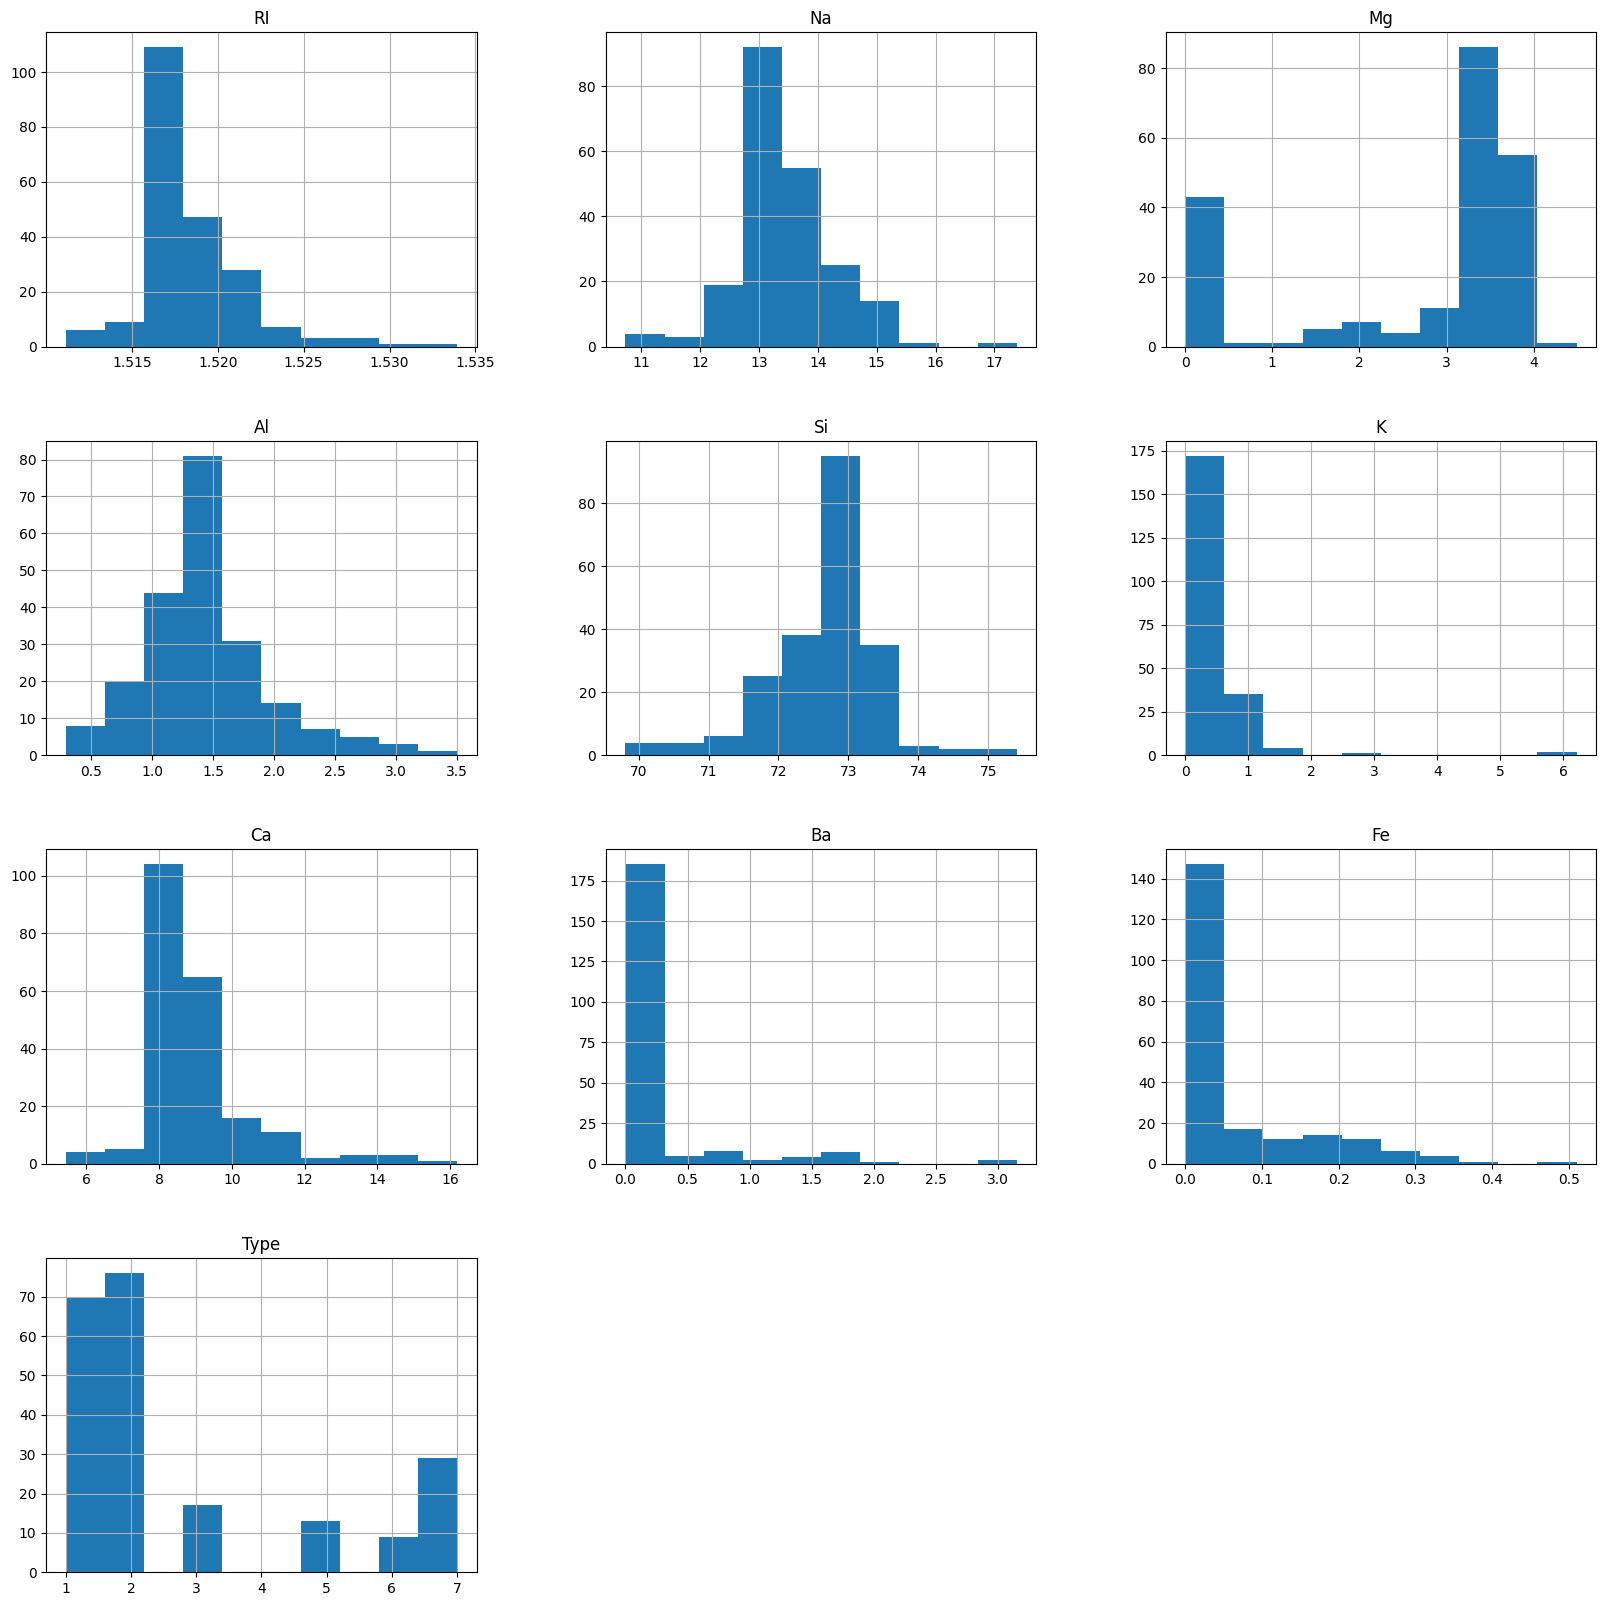

In [9]:
glass_data.hist(figsize=(20,20))

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


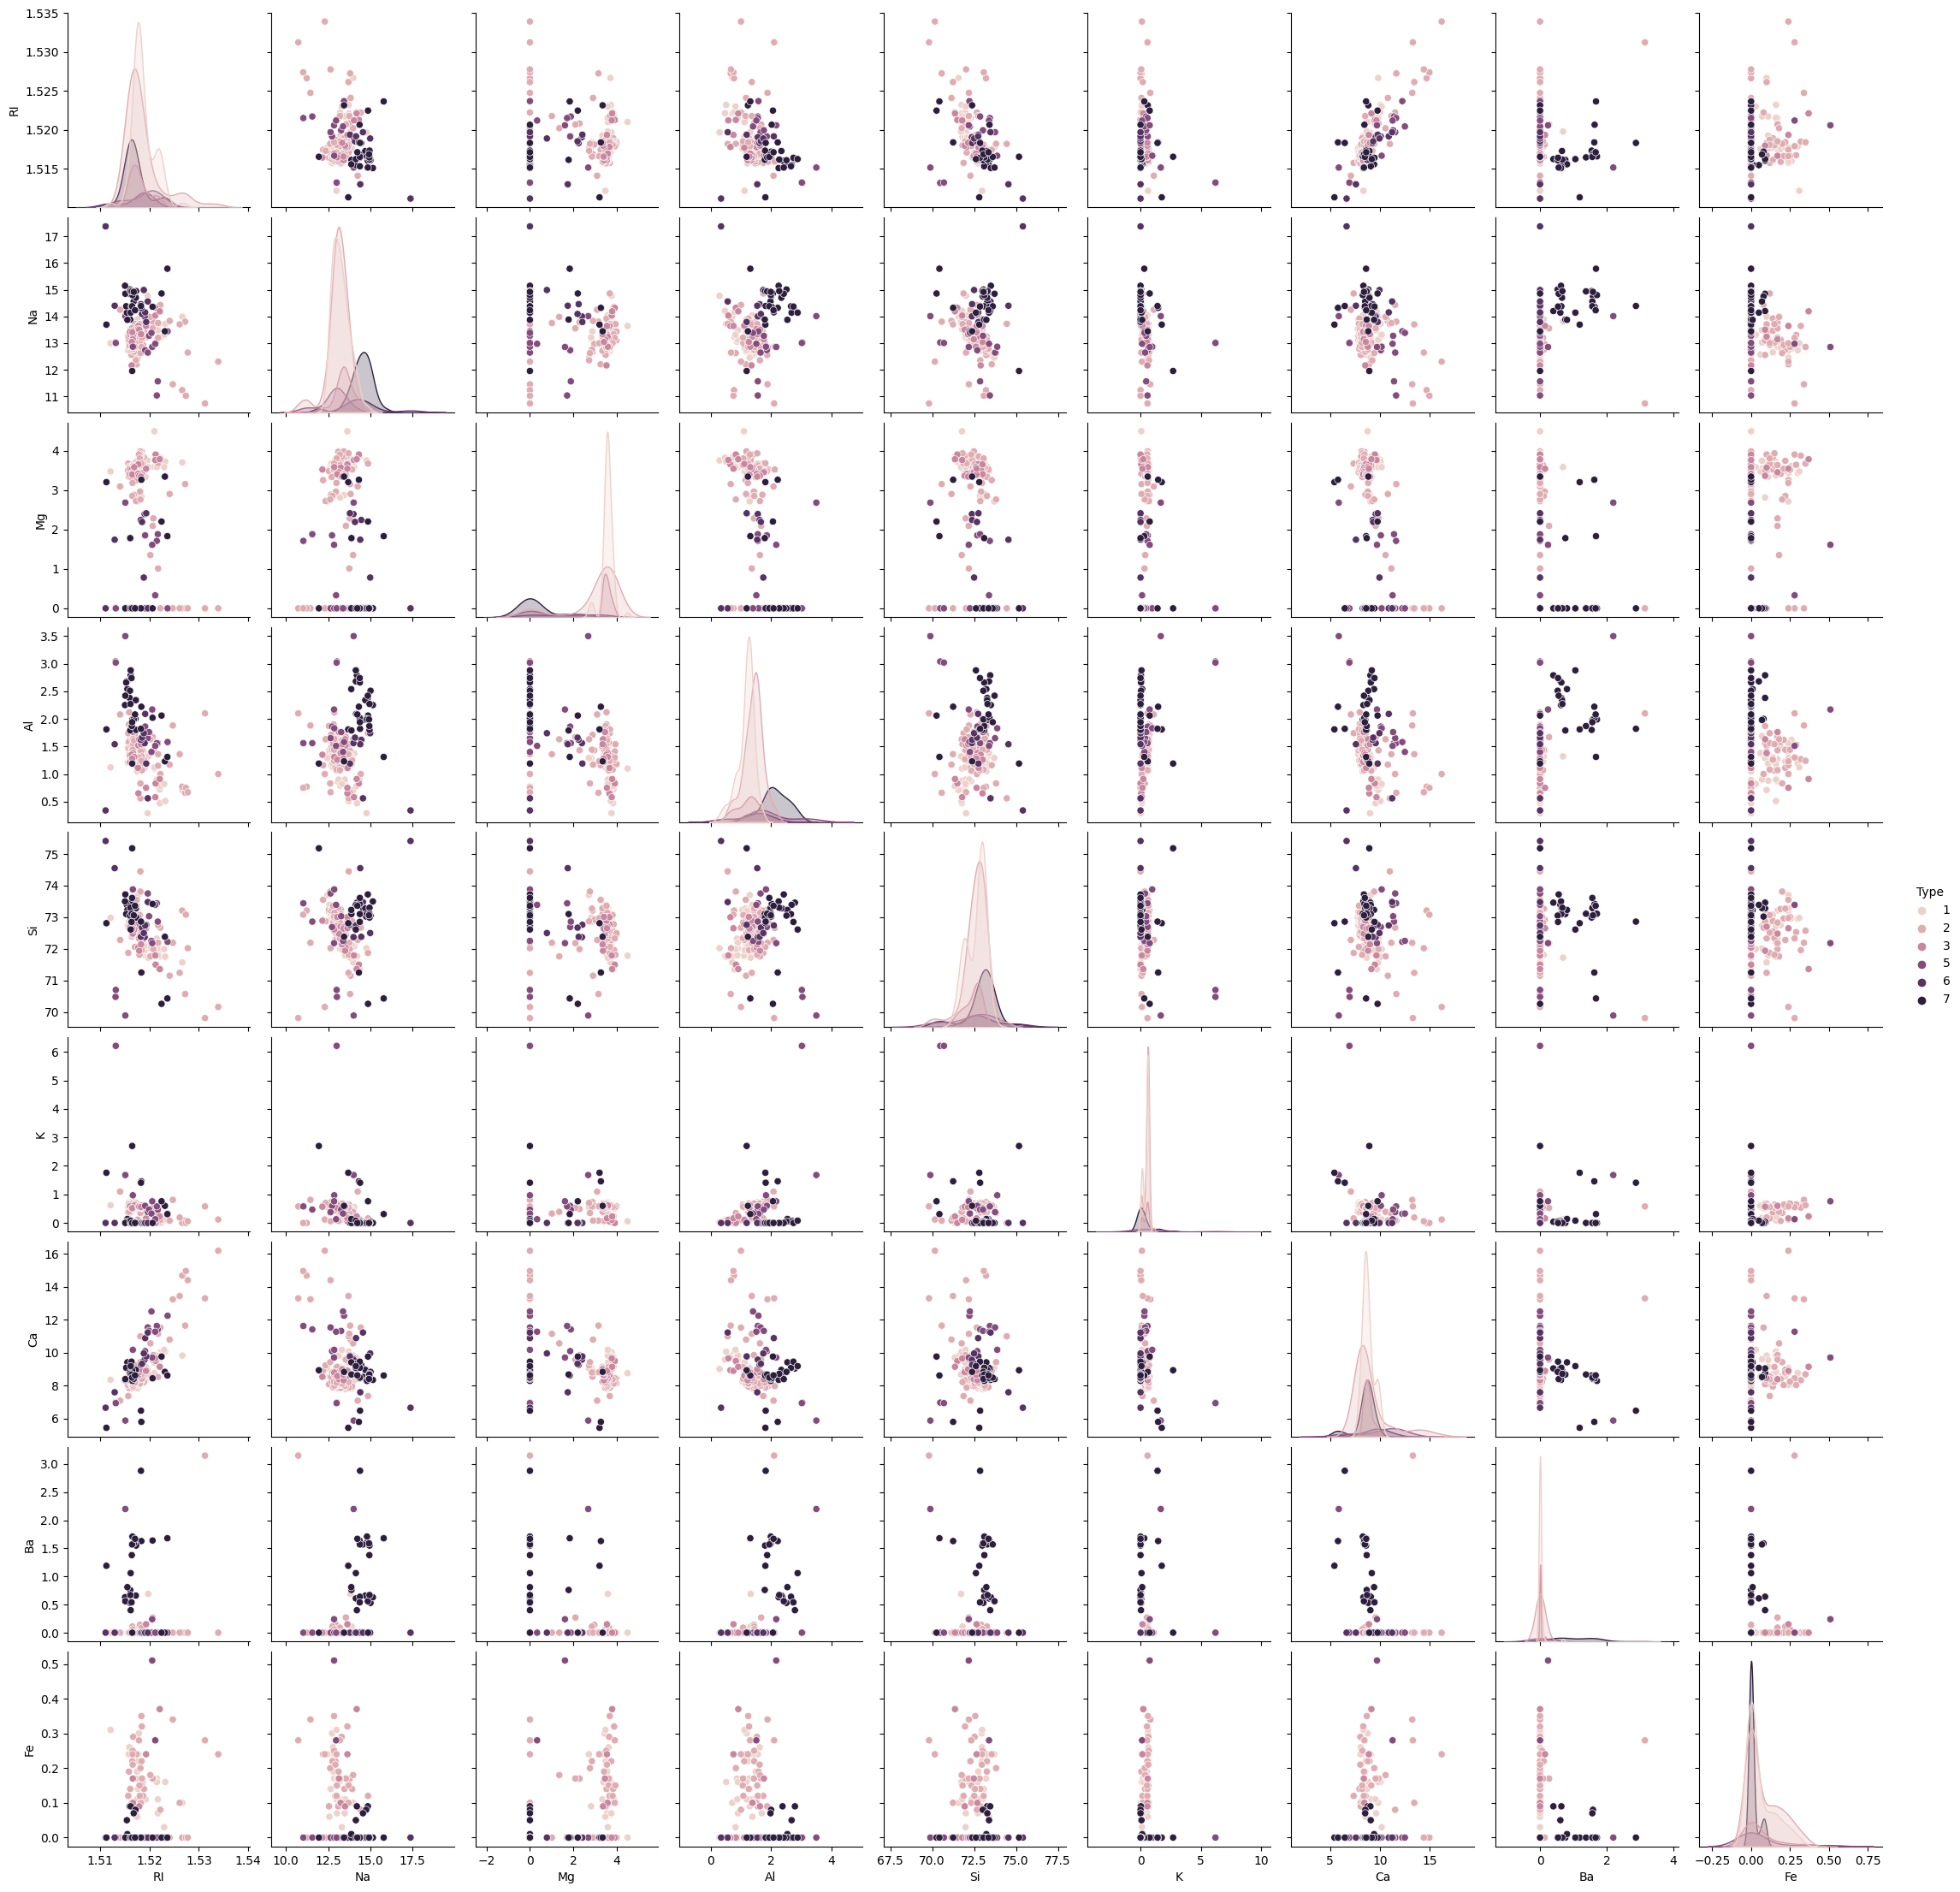

In [10]:
sns.pairplot(glass_data, hue='Type')

## standardize the variables

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:

X = pd.DataFrame(scaler.fit_transform(glass_data.drop(["Type"],axis = 1)))

y = glass_data.Type

In [14]:
X.head()

,0,1,2,3,4,5,6,7,8
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

## Using KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
pred = knn.predict(X_test)

## Predictions and Evaluations

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(confusion_matrix(y_test,pred))

[[14  4  3  0  0  0]
 [ 3 13  4  1  0  0]
 [ 2  2  1  0  0  0]
 [ 1  1  0  2  0  2]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  1  9]]


In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.70      0.67      0.68        21
           2       0.62      0.62      0.62        21
           3       0.12      0.20      0.15         5
           5       0.67      0.33      0.44         6
           6       0.50      1.00      0.67         1
           7       0.82      0.82      0.82        11

    accuracy                           0.62        65
   macro avg       0.57      0.61      0.56        65
weighted avg       0.64      0.62      0.62        65



Choosing a K Value

In [24]:
error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

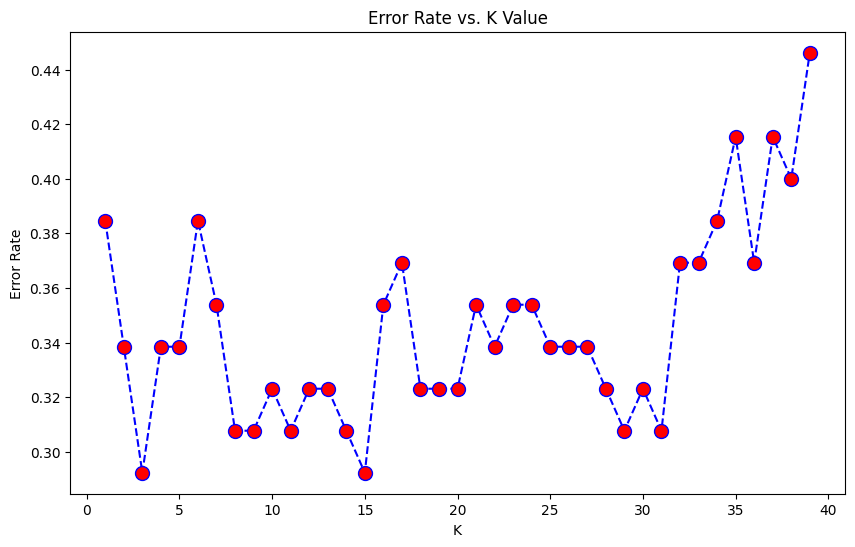

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [26]:
#Orginal K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH k=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH k=1


[[14  4  3  0  0  0]
 [ 3 13  4  1  0  0]
 [ 2  2  1  0  0  0]
 [ 1  1  0  2  0  2]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  1  9]]


              precision    recall  f1-score   support

           1       0.70      0.67      0.68        21
           2       0.62      0.62      0.62        21
           3       0.12      0.20      0.15         5
           5       0.67      0.33      0.44         6
           6       0.50      1.00      0.67         1
           7       0.82      0.82      0.82        11

    accuracy                           0.62        65
   macro avg       0.57      0.61      0.56        65
weighted avg       0.64      0.62      0.62        65



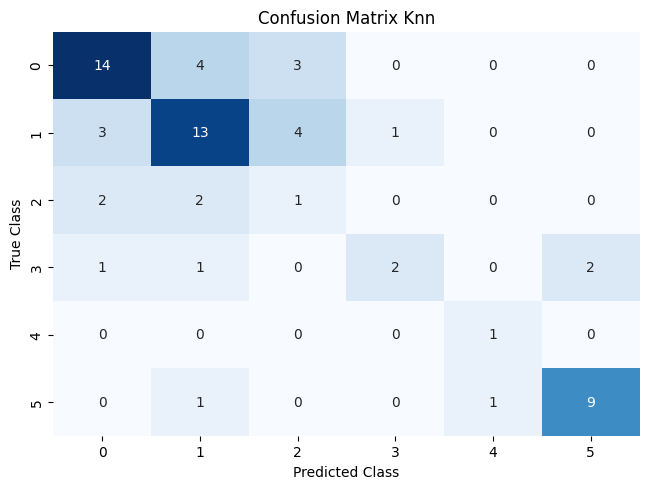

In [27]:
#print CM
matrix_knn = confusion_matrix(y_test, pred)
cm_knn = pd.DataFrame(matrix_knn)

sns.heatmap(cm_knn, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Knn"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (2).

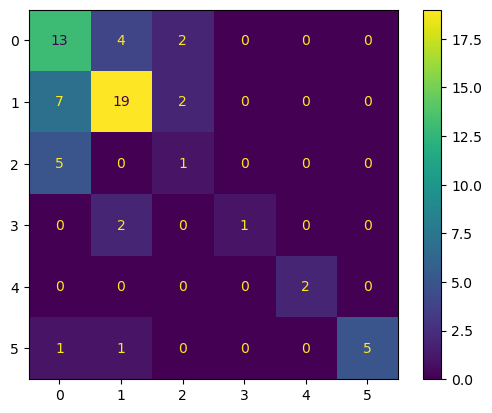

In [96]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, pred)
vis = ConfusionMatrixDisplay(confusion_matrix = conf_matrix,display_labels = [True,False])
vis.plot()
plt.grid(False)
plt.show()

In [97]:
#Now With K=17
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH k=17')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH k=17


[[17  2  0  0  0  0]
 [11 17  0  0  0  0]
 [ 4  2  0  0  0  0]
 [ 0  2  0  1  0  0]
 [ 1  0  0  0  0  1]
 [ 1  1  0  0  0  5]]


              precision    recall  f1-score   support

           1       0.50      0.89      0.64        19
           2       0.71      0.61      0.65        28
           3       0.00      0.00      0.00         6
           5       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         2
           7       0.83      0.71      0.77         7

    accuracy                           0.62        65
   macro avg       0.51      0.42      0.43        65
weighted avg       0.59      0.62      0.58        65



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (2).

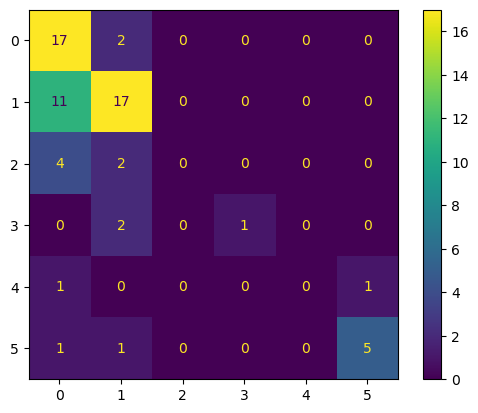

In [98]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, pred)
vis = ConfusionMatrixDisplay(confusion_matrix = conf_matrix,display_labels = [True,False])
vis.plot()
plt.grid(False)
plt.show()